In [1]:
%pip install plotly
%pip install WordCloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
import plotly.express as px
from wordcloud import WordCloud

Data Preprocessing and Cleaning

In [4]:
df_1 =pd.read_csv("dataset_olympics.csv")


df_1.head(10)

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   
6   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
7   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0     Netherlands   
8   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   
9   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season         City          Sport  \
0  CHN  1992 Summer  1992  Summer    Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer       London           Judo   
2  DEN  1920 Summer  1920  Summer    Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
5  NED  1988 Winter  1988  Winter      Calgary  Speed Skating   
6  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
7  NED  1992 Winter  1992  Winter  Albertville  Speed Skating   
8  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   
9  NED  1994 Winter  1994  Winter  Lillehammer  Speed Skating   

                                Event Medal  
0         Basketball Men's Basketball   NaN  
1        Judo Men's Extra-Lightweight   NaN  
2             Football Men's Football   NaN  
3         Tug-Of-War Men's Tug-Of-War  Gold  
4    Speed Skating Women's 500 metres   NaN  
5  Speed Skating Women's 1,000 metres   NaN  
6    Speed Skating Women's 500 metres   NaN  
7  Speed Skating Women's 1,000 metres   NaN  
8    Speed Skating Women's 500 metres   NaN  
9  Speed Skating Women's 1,000 metres   NaN

In [3]:
df_2 =pd.read_csv("noc_region.csv")
df_2.head(10)

NOC          reg                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
5  ANG       Angola                   NaN
6  ANT      Antigua   Antigua and Barbuda
7  ANZ    Australia           Australasia
8  ARG    Argentina                   NaN
9  ARM      Armenia                   NaN

In [6]:
df_2.columns

Index(['NOC', 'reg', 'notes'], dtype='object')

In [7]:
len(df_2.columns)

3

In [8]:
df_2.describe()

NOC      reg                 notes
count   230      227                    21
unique  230      206                    21
top     AFG  Germany  Netherlands Antilles
freq      1        4                     1

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   reg     227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [12]:
df= pd.merge(
    df_1,
    df_2,
    on="NOC",
    how="left"
)
df

ID                            Name Sex   Age  Height  Weight  \
0          1                       A Dijiang   M  24.0   180.0    80.0   
1          2                        A Lamusi   M  23.0   170.0    60.0   
2          3             Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3          4            Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4          5        Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...      ...                             ...  ..   ...     ...     ...   
69995  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69996  35656              Stuart Fitzsimmons   M  19.0     NaN     NaN   
69997  35657  David Thomas "Dave" Fitzsimons   M  26.0   170.0    65.0   
69998  35657  David Thomas "Dave" Fitzsimons   M  30.0   170.0    65.0   
69999  35658                    Marek Fiurek   M  23.0   180.0    68.0   

                 Team  NOC        Games  Year  Season       City  \
0               China  CHN  1992 Summer  1992  Summer  Barcelona   
1               China  CHN  2012 Summer  2012  Summer     London   
2             Denmark  DEN  1920 Summer  1920  Summer  Antwerpen   
3      Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris   
4         Netherlands  NED  1988 Winter  1988  Winter    Calgary   
...               ...  ...          ...   ...     ...        ...   
69995   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69996   Great Britain  GBR  1976 Winter  1976  Winter  Innsbruck   
69997       Australia  AUS  1976 Summer  1976  Summer   Montreal   
69998       Australia  AUS  1980 Summer  1980  Summer     Moskva   
69999  Czech Republic  CZE  1998 Winter  1998  Winter     Nagano   

                 Sport                             Event Medal  \
0           Basketball       Basketball Men's Basketball   NaN   
1                 Judo      Judo Men's Extra-Lightweight   NaN   
2             Football           Football Men's Football   NaN   
3           Tug-Of-War       Tug-Of-War Men's Tug-Of-War  Gold   
4        Speed Skating  Speed Skating Women's 500 metres   NaN   
...                ...                               ...   ...   
69995    Alpine Skiing  Alpine Skiing Men's Giant Slalom   NaN   
69996    Alpine Skiing        Alpine Skiing Men's Slalom   NaN   
69997        Athletics     Athletics Men's 10,000 metres   NaN   
69998        Athletics      Athletics Men's 5,000 metres   NaN   
69999  Nordic Combined        Nordic Combined Men's Team   NaN   

                  reg notes  
0               China   NaN  
1               China   NaN  
2             Denmark   NaN  
3             Denmark   NaN  
4         Netherlands   NaN  
...               ...   ...  
69995              UK   NaN  
69996              UK   NaN  
69997       Australia   NaN  
69998       Australia   NaN  
69999  Czech Republic   NaN  

[70000 rows x 17 columns]

In [13]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'reg', 'notes'],
      dtype='object')

In [14]:
len(df.columns)

17

In [15]:
len(df)

70000

In [16]:
df.describe()

ID           Age        Height        Weight          Year
count  70000.000000  67268.000000  53746.000000  52899.000000  70000.000000
mean   18081.846986     25.644645    175.505303     70.900216   1977.766457
std    10235.613253      6.485239     10.384203     14.217489     30.103306
min        1.000000     11.000000    127.000000     25.000000   1896.000000
25%     9325.750000     21.000000    168.000000     61.000000   1960.000000
50%    18032.000000     25.000000    175.000000     70.000000   1984.000000
75%    26978.000000     28.000000    183.000000     79.000000   2002.000000
max    35658.000000     88.000000    223.000000    214.000000   2016.000000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
 15  reg     69937 non-null  object 
 16  notes   1244 non-null   object 
dtypes: float64(3), int64(2), object(12)
memory usage: 9.1+ MB


In [18]:
df.describe(include=["object"])

Name    Sex           Team    NOC  \
count                              70000  70000          70000  70000   
unique                             35556      2            827    226   
top     Oksana Aleksandrovna Chusovitina      M  United States    USA   
freq                                  29  51877           4979   5216   

              Games  Season    City      Sport                    Event Medal  \
count         70000   70000   70000      70000                    70000  9690   
unique           51       2      42         65                      744     3   
top     2016 Summer  Summer  London  Athletics  Football Men's Football  Gold   
freq           3675   58467    6034      10629                     1738  3292   

          reg       notes  
count   69937        1244  
unique    202          20  
top       USA  Yugoslavia  
freq     5216         554

In [19]:

df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
reg          63
notes     68756
dtype: int64

Percentage of missing Values

In [20]:
missing_percentage = 100*(df.isna().sum().sort_values(ascending=False)/len(df))
missing_percentage[missing_percentage!=0]

notes     98.222857
Medal     86.157143
Weight    24.430000
Height    23.220000
Age        3.902857
reg        0.090000
dtype: float64

In [21]:
len(df['NOC'])

70000

Percentage OF Misssing VAlue

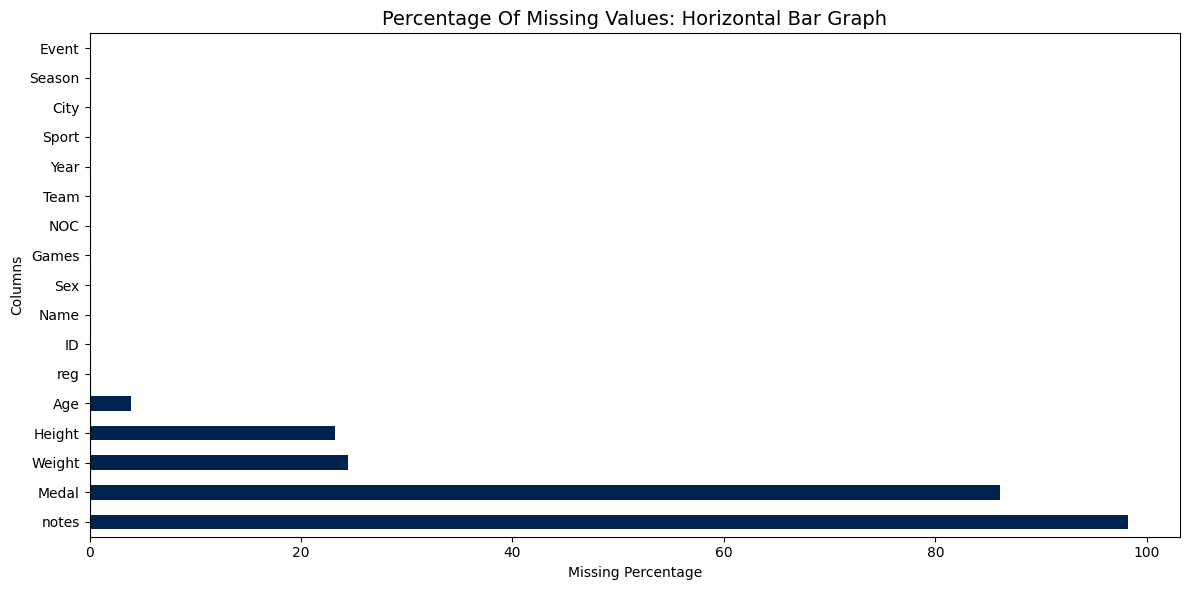

In [22]:


plt.figure(figsize=(12, 6))

missing_percentage.plot(
    kind="barh",         
    cmap="cividis",
    grid=False
)

plt.title("Percentage Of Missing Values: Horizontal Bar Graph", fontsize=14)
plt.xlabel("Missing Percentage")
plt.ylabel("Columns")

plt.tight_layout()
plt.show()


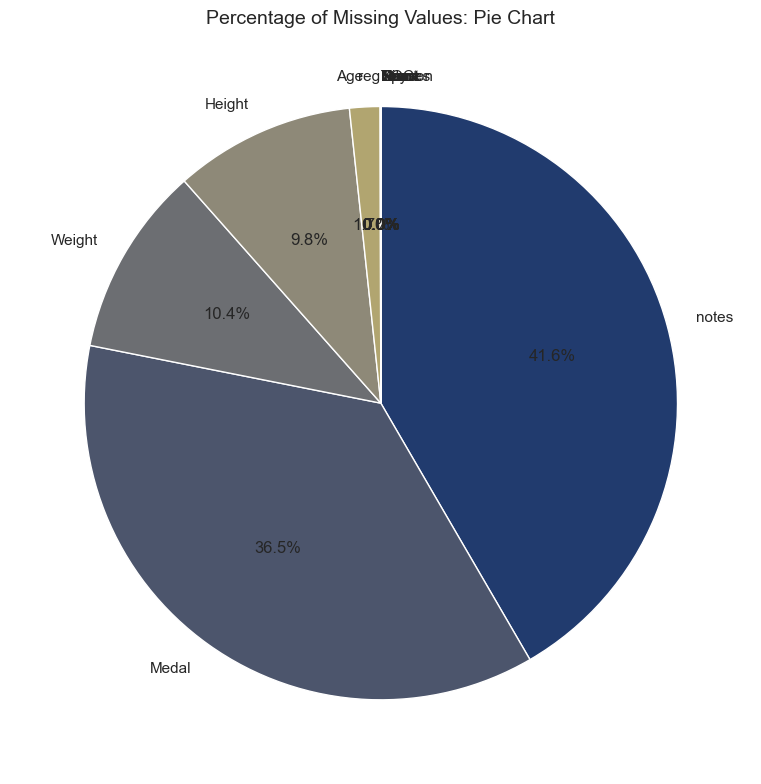

In [23]:
sns.set_theme(style="white", palette="cividis")

plt.figure(figsize=(16,8   ))

plt.pie(
    missing_percentage.values,
    labels=missing_percentage.index,
    startangle=90,
    autopct='%1.1f%%',
    counterclock=False
)

plt.title("Percentage of Missing Values: Pie Chart", fontsize=14)
plt.tight_layout()
plt.show()

In [24]:
df["notes"].value_counts().sum()

np.int64(1244)

In [25]:
df["notes"].isnull().sum()

np.int64(68756)

In [26]:
df.drop(["notes"],axis=1,inplace=True)

In [27]:
len(  df.columns)

16

In [28]:

df.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
reg          63
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(383)

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df_1 =pd.read_csv("dataset_olympics.csv")
df_2 =pd.read_csv("noc_region.csv")

df_1.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [33]:
df["Age"].fillna(df["Age"].mean())

0        24.0
1        23.0
2        24.0
3        34.0
4        21.0
         ... 
69995    19.0
69996    19.0
69997    26.0
69998    30.0
69999    23.0
Name: Age, Length: 69617, dtype: float64

In [34]:
df["Height"].fillna(df["Height"].mean())



0        180.000000
1        170.000000
2        175.504736
3        175.504736
4        185.000000
            ...    
69995    175.504736
69996    175.504736
69997    170.000000
69998    170.000000
69999    180.000000
Name: Height, Length: 69617, dtype: float64

In [35]:
df["Weight"].fillna(df["Weight"].mean())

0        80.000000
1        60.000000
2        70.900216
3        70.900216
4        82.000000
           ...    
69995    70.900216
69996    70.900216
69997    65.000000
69998    65.000000
69999    68.000000
Name: Weight, Length: 69617, dtype: float64

In [37]:
df_1 =pd.read_csv("dataset_olympics.csv")
df_2 =pd.read_csv("noc_region.csv")

df_1.head()


ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [38]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        2671
Height    15876
Weight    16718
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     59931
reg          63
dtype: int64

In [39]:
df["reg"].fillna("Region Unknown")

0                 China
1                 China
2               Denmark
3               Denmark
4           Netherlands
              ...      
69995                UK
69996                UK
69997         Australia
69998         Australia
69999    Czech Republic
Name: reg, Length: 69617, dtype: object

In [40]:
df['Medal'].fillna(value="Medal Not Won")
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal          reg  
0       Basketball Men's Basketball   NaN        China  
1      Judo Men's Extra-Lightweight   NaN        China  
2           Football Men's Football   NaN      Denmark  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark  
4  Speed Skating Women's 500 metres   NaN  Netherlands

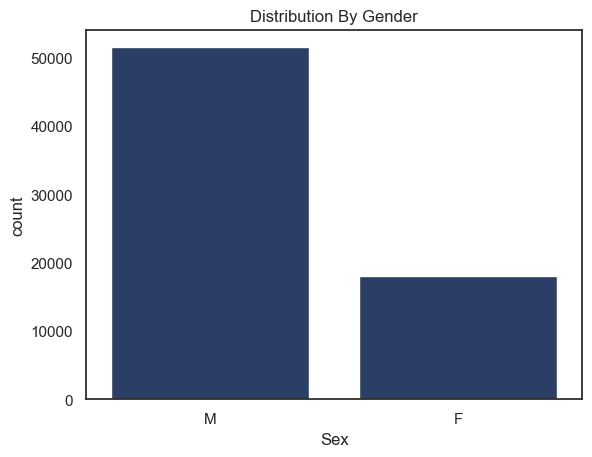

In [41]:
sns.countplot(data=df,x="Sex")
plt.title("Distribution By Gender")
plt.show()

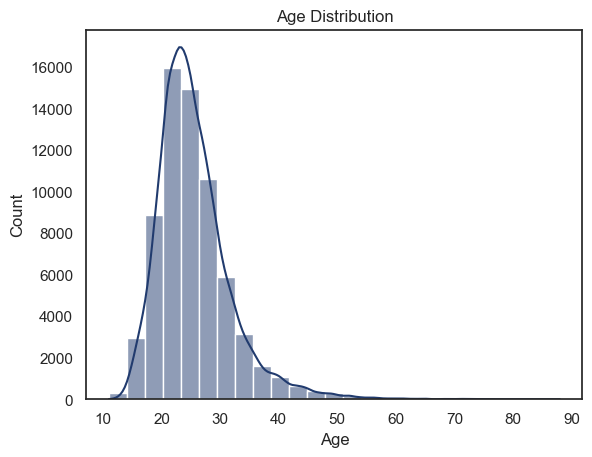

In [42]:
sns.histplot(data =df,x="Age",bins=25,kde=True)
plt.title("Age Distribution")
plt.show()

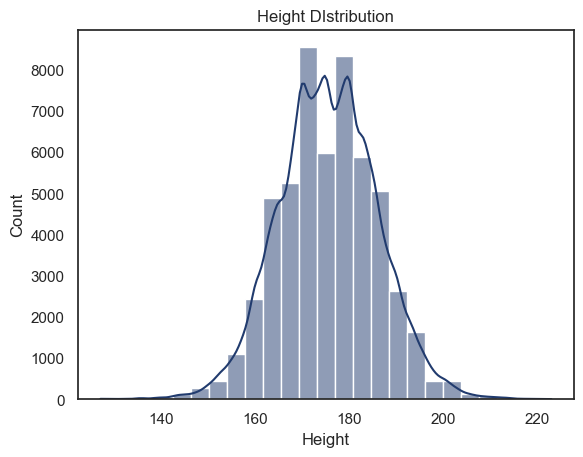

In [43]:
sns.histplot(data=df,x="Height",bins=25,kde=2)
plt.title("Height DIstribution")
plt.show()

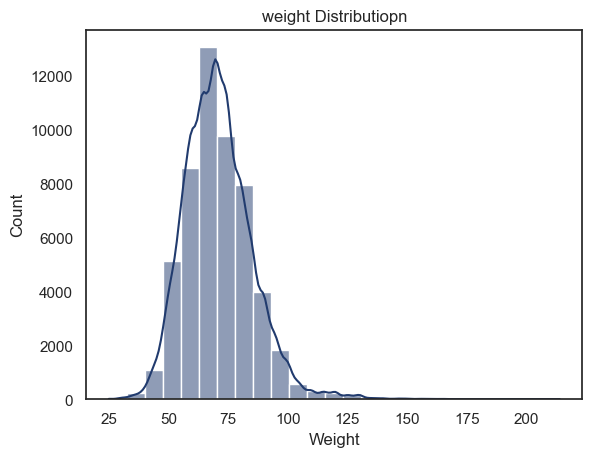

In [46]:
sns.histplot(data=df,x="Weight",bins=25,kde=True)
plt.title("weight Distributiopn")
plt.show()

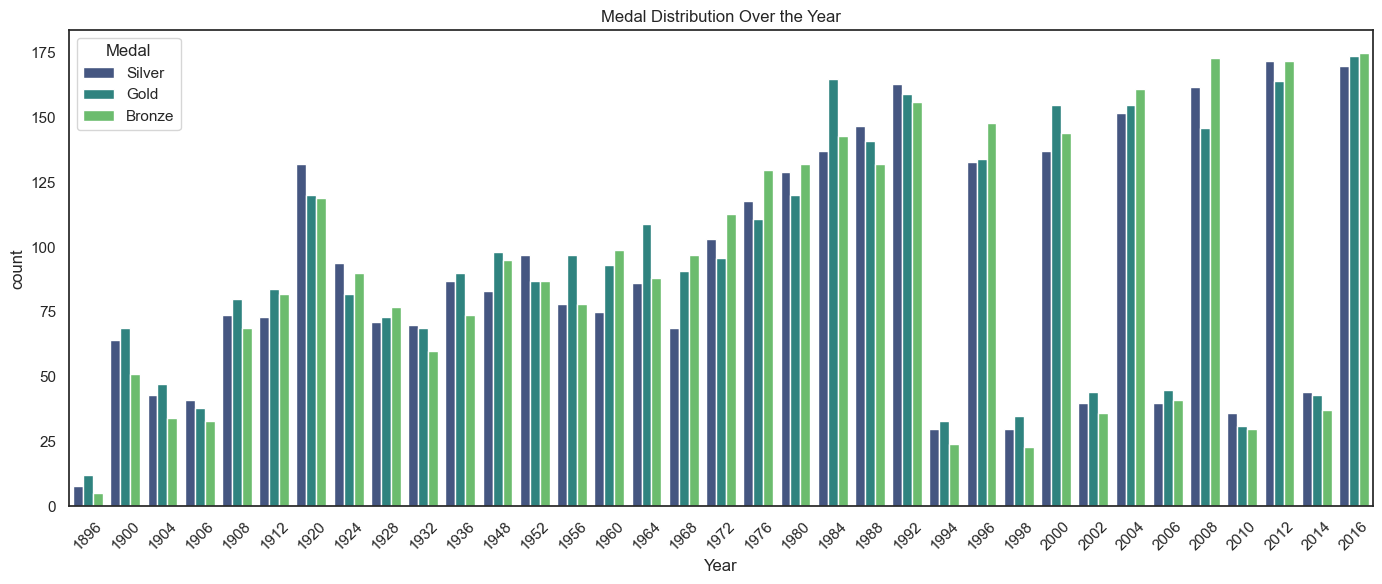

In [47]:
plt.figure(figsize=(14,6))

sns.countplot(data=df, x='Year', hue='Medal',palette='viridis')

plt.title('Medal Distribution Over the Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
year_avg_age=df.groupby('Year')['Age'].mean()
print(year_avg_age)

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64


In [49]:
sport_median_height =df.groupby('Sport')['Height'].median()

print(sport_median_height.min())

164.0


In [50]:
sport_median_height[sport_median_height==165.0]

Sport
Trampolining    165.0
Name: Height, dtype: float64

In [51]:
country_gender_count= df.groupby(["NOC","Sex"])["ID"].count()
print(country_gender_count)

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: ID, Length: 432, dtype: int64


In [52]:
Country_gold_medal =df[df["Medal"] =="Gold"].groupby("NOC")["Medal"].count()
print(Country_gold_medal.max())

747


In [53]:
Country_gold_medal[Country_gold_medal==747]

NOC
USA    747
Name: Medal, dtype: int64

In [55]:
sport_gender_average_weight=df.groupby(["Sport","Sex"])["Weight"].mean()
print(sport_gender_average_weight.max())


93.0909090909091


Number Of Unique Events Per Sport

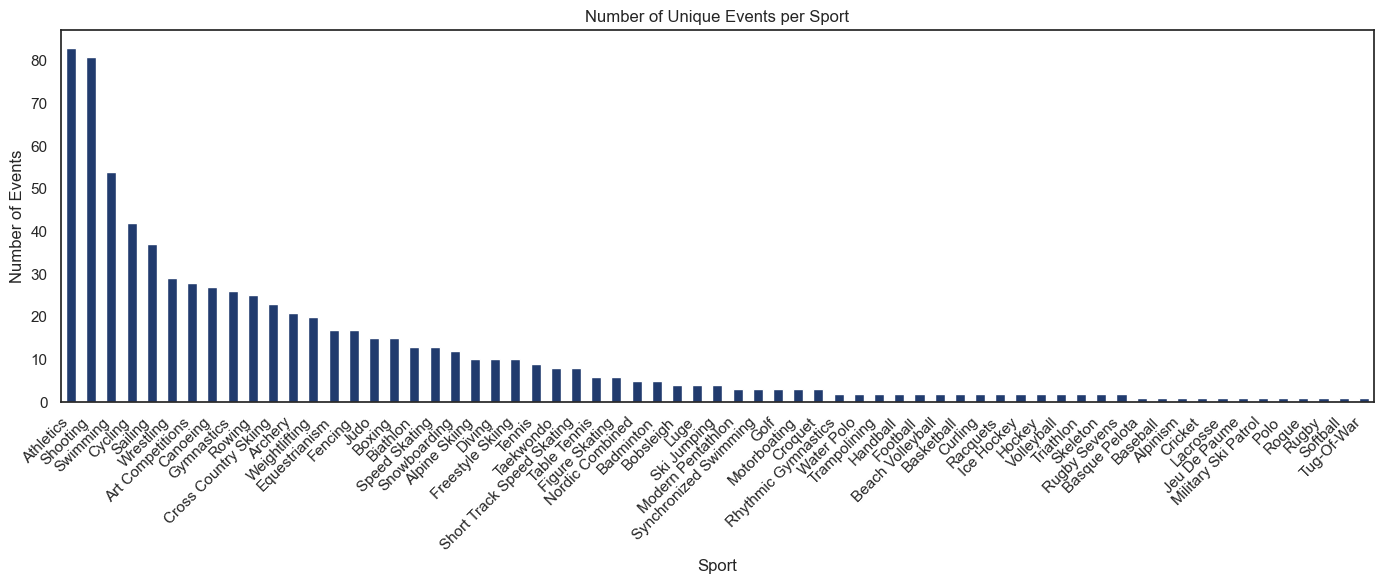

In [56]:
plt.figure(figsize=(14,6))

sport_event_count = (
    df.groupby('Sport')['Event']
      .nunique()
      .sort_values(ascending=False)
)

sport_event_count.plot(kind="bar")

plt.title("Number of Unique Events per Sport")
plt.xlabel("Sport")
plt.ylabel("Number of Events")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


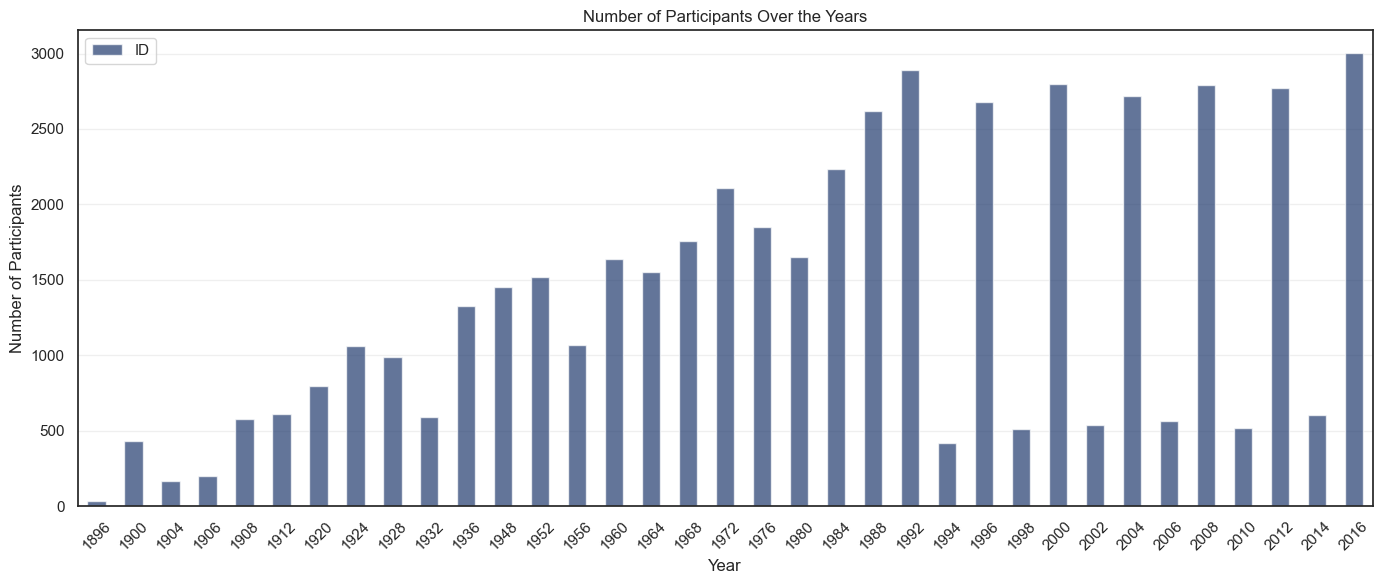

In [57]:
plt.figure(figsize=(14,6))

year_participant_count = df.groupby('Year')['ID'].nunique()


year_participant_count.plot(kind='bar', alpha=0.7)


plt.legend()
plt.title('Number of Participants Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

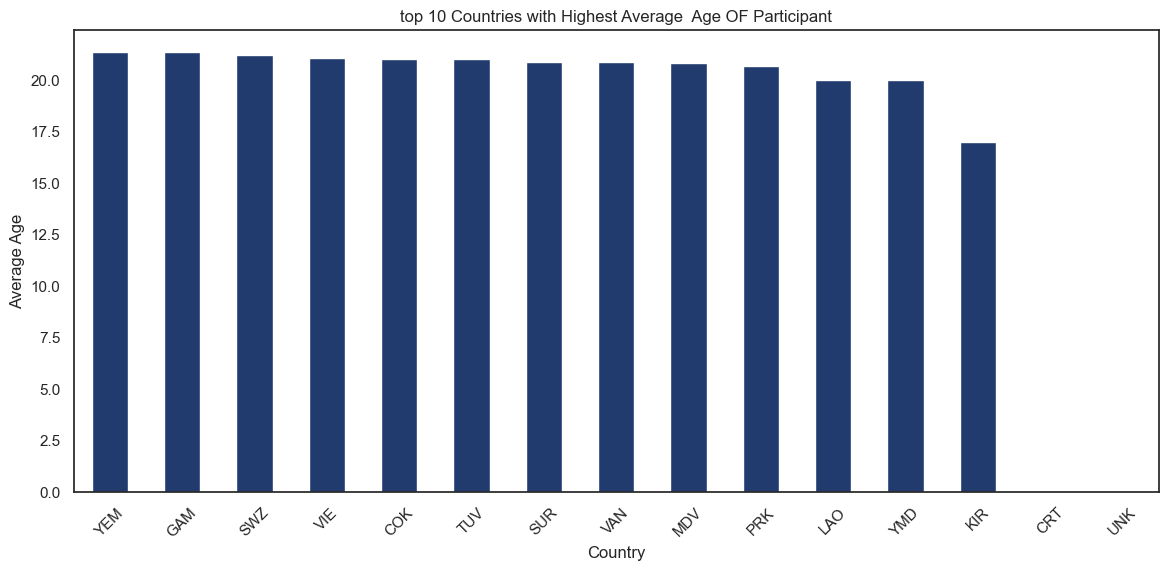

In [58]:
plt.figure(figsize=(14,6))

country_avg_age=df.groupby('NOC')['Age'].mean().sort_values(ascending=False)

country_avg_age.tail(15).plot(kind='bar')
plt.title('top 10 Countries with Highest Average  Age OF Participant')
plt.xlabel("Country")
plt.ylabel('Average Age')
plt.xticks(rotation  =45)
plt.show()

A Word-Cloud That Graphically Shows The Nations Have Sent Maximum Number Of Athletes Over The Years

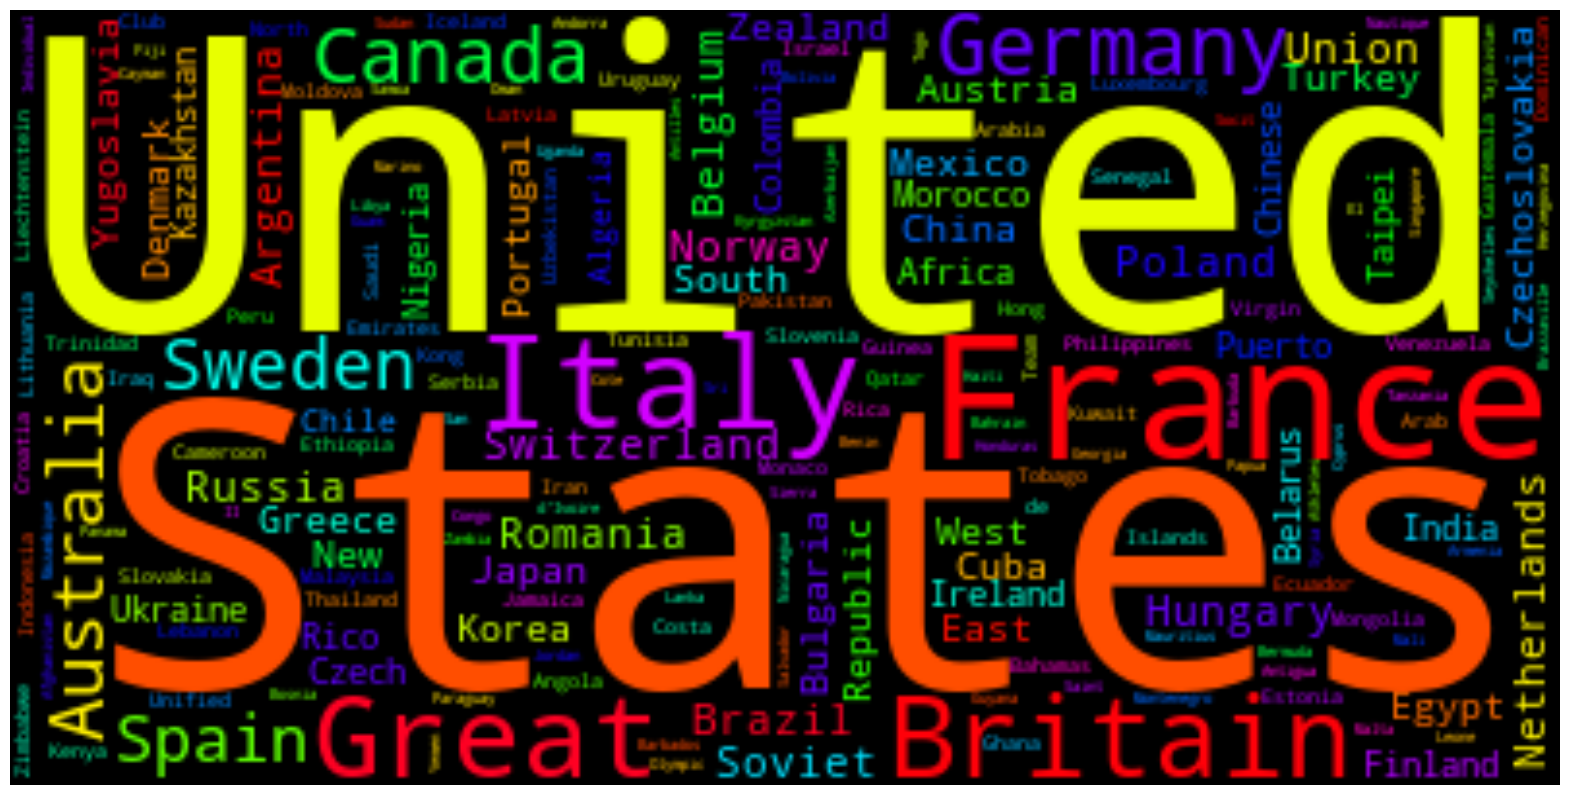

In [59]:
# We will first join all the instances of all the teams into a single string and store it in the variable "countries".
countries = " ".join(n for n in df['Team'])
plt.figure(figsize=(20,15))
wc = WordCloud(background_color='black',colormap='gist_rainbow',collocations=False).generate(countries)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


In [60]:
#Lets verify the above word cloud using this simple code:
count =df['Team'].value_counts()
count.head(20)

Team
United States    4896
France           4539
Italy            4010
Great Britain    3248
Canada           2536
Australia        2235
Sweden           2043
Germany          1946
Spain            1836
Switzerland      1530
Brazil           1529
Hungary          1507
Netherlands      1443
Romania          1332
Belgium          1278
Soviet Union     1162
Norway           1134
Argentina        1091
Russia           1030
Poland            994
Name: count, dtype: int64

 The Relation Between Various Features And Labels In The Olympics Dataset

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\AppData\Roaming\Py

<Figure size 1500x1000 with 0 Axes>

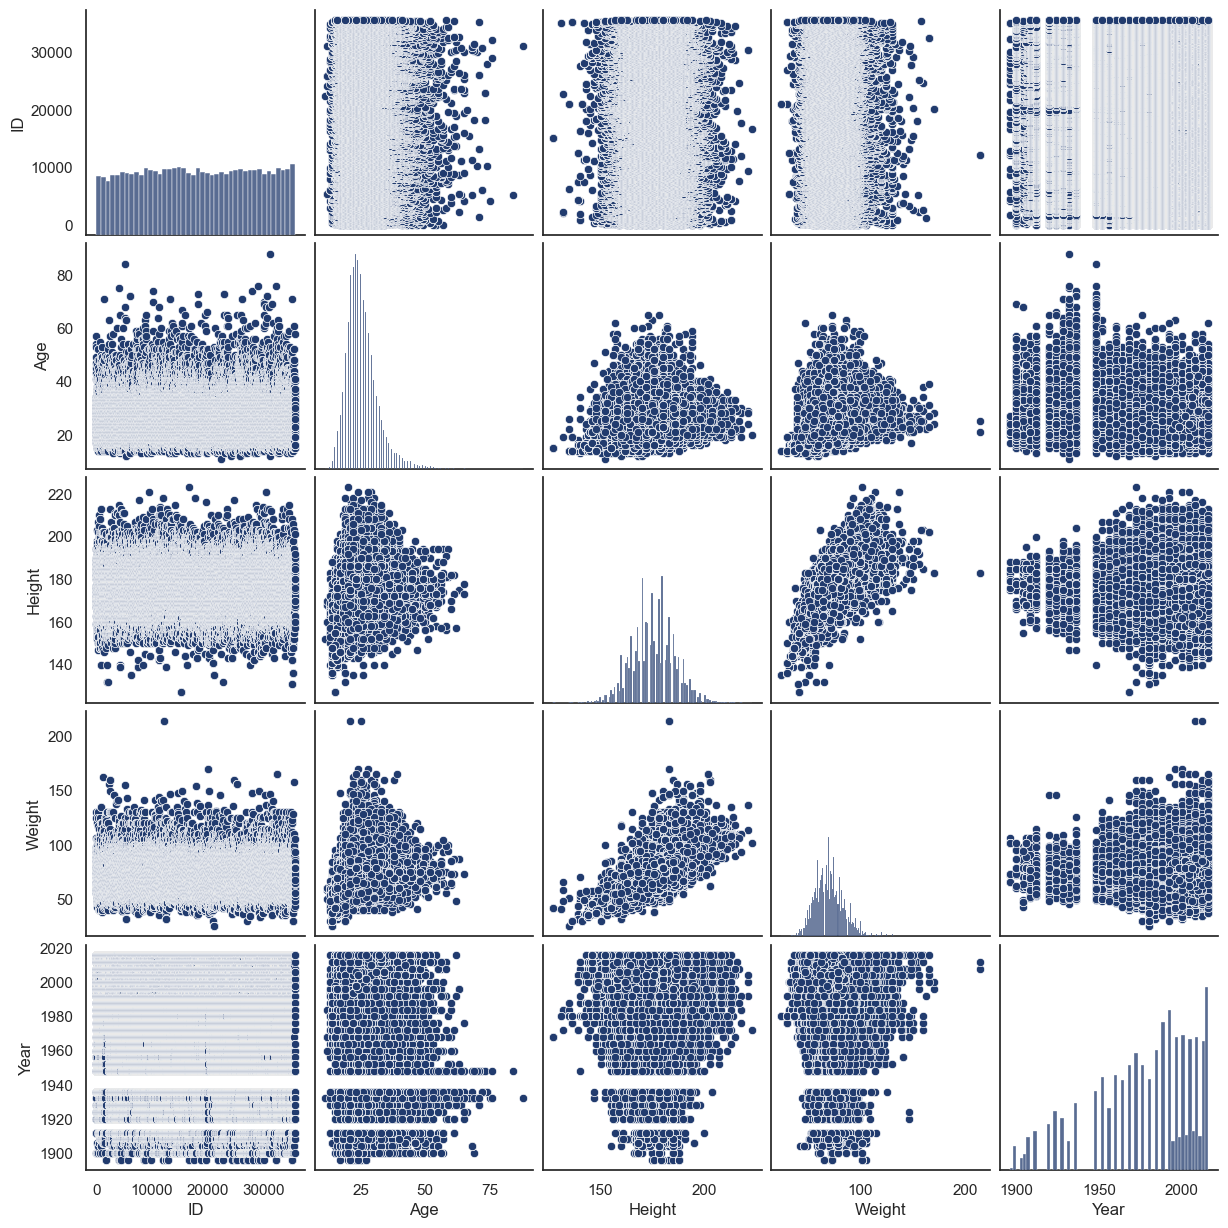

In [61]:
plt.figure(figsize=(15,10 ))
sns.pairplot(df,palette="theme")
plt.show()


The Overall Spread Of The Age Of Athletes In The Summer Olympics

In [62]:
df_1 =pd.read_csv("dataset_olympics.csv")
df_2 =pd.read_csv("noc_region.csv")

import pandas as pd
df = pd.merge(
    df_1,
    df_2,
    on="NOC",
    how="left"
)
df


import plotly.express as px
line_colors = ["#14cc60", "#036d19", "#09a129"]

fig = px.box(
    df,
    x="Year",
    y="Age",
    title="<b>The Overall Trend Of Athlete's Age</b>",
    color_discrete_sequence=line_colors,
    template="none"
)

fig.update_layout(plot_bgcolor="whitesmoke")
fig.show()


 The Overall Trend Of The Summer Olympics Over The Years

In [63]:
trend_df= df.groupby('Year').count()['ID'].reset_index()
trend_df.rename(columns={"ID":"Count"},inplace=True)
trend_df.head()

Year  Count
0  1896     65
1  1900    631
2  1904    308
3  1906    431
4  1908    865

The VAriation In PArticipants Over The Years

In [64]:
line_colors=[ "#14cc60","#036d19","#09a129"]
fig= px.line(trend_df,x='Year',y='Count',title="<b>The Variation In Participants Over The Years</b>",markers=True,color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
fig.show()

In [67]:

fig=px.histogram(trend_df,x='Year',y='Count',title="<b>The Variation In Participants Over The Years</b>",nbins=70,color_discrete_sequence=line_colors,template = "none")
fig.update_layout(plot_bgcolor = " whitesmoke")
fig.show()

The Variation of Female Participants Over The Years In The Olympics

In [68]:
female_df= df[df["Sex"]=="F"]
female_df.head()

ID                      Name Sex   Age  Height  Weight         Team  NOC  \
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  Netherlands  NED   
5   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0  Netherlands  NED   
6   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0  Netherlands  NED   
7   5  Christine Jacoba Aaftink   F  25.0   185.0    82.0  Netherlands  NED   
8   5  Christine Jacoba Aaftink   F  27.0   185.0    82.0  Netherlands  NED   

         Games  Year  Season         City          Sport  \
4  1988 Winter  1988  Winter      Calgary  Speed Skating   
5  1988 Winter  1988  Winter      Calgary  Speed Skating   
6  1992 Winter  1992  Winter  Albertville  Speed Skating   
7  1992 Winter  1992  Winter  Albertville  Speed Skating   
8  1994 Winter  1994  Winter  Lillehammer  Speed Skating   

                                Event Medal          reg notes  
4    Speed Skating Women's 500 metres   NaN  Netherlands   NaN  
5  Speed Skating Women's 1,000 metres   NaN  Netherlands   NaN  
6    Speed Skating Women's 500 metres   NaN  Netherlands   NaN  
7  Speed Skating Women's 1,000 metres   NaN  Netherlands   NaN  
8    Speed Skating Women's 500 metres   NaN  Netherlands   NaN

C:\Users\HP\AppData\Local\Temp\ipykernel_8296\1044277397.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




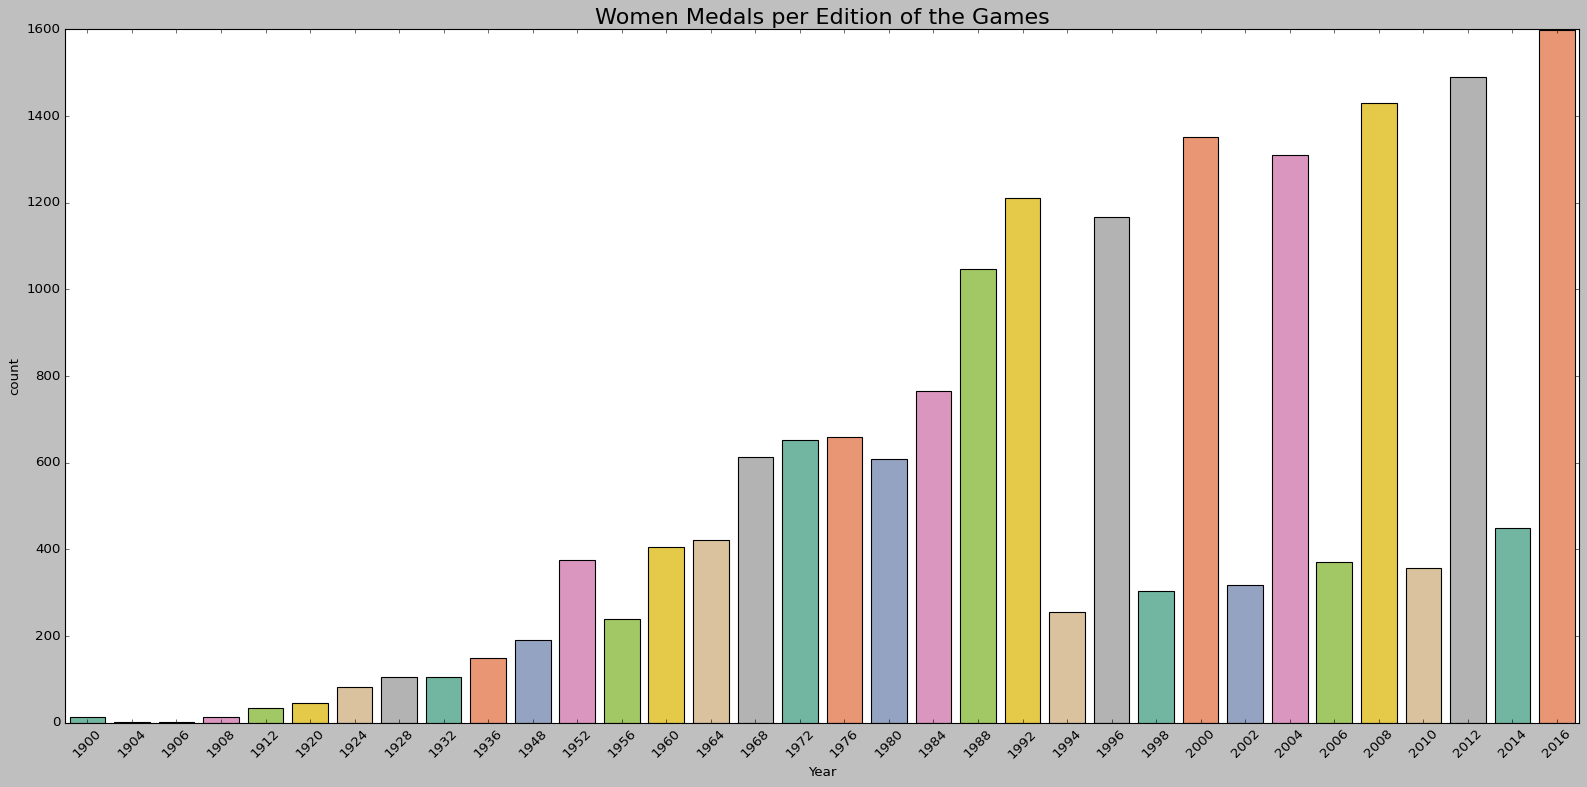

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('classic')
plt.figure(figsize=(20, 10))

sns.countplot(
    x='Year',
    data=female_df,
    palette='Set2'   # or 'deep', 'muted', 'viridis'
)

plt.title('Women Medals per Edition of the Games', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The Variation of Female Participants In Comparsion To Male Participants Over The Years

In [70]:
gender_trend_df=df.groupby(['Sex','Year']).count().reset_index()
gender_trend_df.head(20)

Sex  Year   ID  Name  Age  Height  Weight  Team  NOC  Games  Season  City  \
0    F  1900   13    13   10       0       0    13   13     13      13    13   
1    F  1904    2     2    2       0       0     2    2      2       2     2   
2    F  1906    2     2    2       0       0     2    2      2       2     2   
3    F  1908   12    12   12       0       0    12   12     12      12    12   
4    F  1912   34    34   34       0       0    34   34     34      34    34   
5    F  1920   44    44   42       3       0    44   44     44      44    44   
6    F  1924   83    83   70      12       3    83   83     83      83    83   
7    F  1928  104   104   84      24      13   104  104    104     104   104   
8    F  1932  104   104  100      39      15   104  104    104     104   104   
9    F  1936  148   148  142      26      20   148  148    148     148   148   
10   F  1948  191   191  178      33      33   191  191    191     191   191   
11   F  1952  374   374  373      86      84   374  374    374     374   374   
12   F  1956  238   238  232     108     106   238  238    238     238   238   
13   F  1960  406   406  406     357     356   406  406    406     406   406   
14   F  1964  422   422  422     389     389   422  422    422     422   422   
15   F  1968  612   612  610     602     602   612  612    612     612   612   
16   F  1972  651   651  649     625     615   651  651    651     651   651   
17   F  1976  659   659  656     627     621   659  659    659     659   659   
18   F  1980  608   608  598     572     565   608  608    608     608   608   
19   F  1984  766   766  763     742     734   766  766    766     766   766   

    Sport  Event  Medal  reg  notes  
0      13     13      5   13      0  
1       2      2      2    2      0  
2       2      2      1    2      0  
3      12     12      4   12      0  
4      34     34     10   34      1  
5      44     44     10   44      0  
6      83     83     17   83      0  
7     104    104     21  104      0  
8     104    104     20  104      0  
9     148    148     21  148      1  
10    191    191     31  191      6  
11    374    374     36  374     10  
12    238    238     32  238      4  
13    406    406     39  406      6  
14    422    422     65  422      7  
15    612    612     57  612     14  
16    651    651     65  649     13  
17    659    659     98  658      3  
18    608    608    112  608     11  
19    766    766    129  766     31

In [71]:
line_colors = ["#0a2e36",'#27fb6b']
a=px.line(gender_trend_df,x="Year",y="ID",color='Sex',markers=True,color_discrete_sequence=line_colors,template = "none")
a.update_layout(plot_bgcolor = "whitesmoke",
    title="     <b>The Male Vs Female Participants Trend Over The Years <b>    ", 
    yaxis_title="Number Of Participants"
)
a.show()

In [72]:
fig = px.histogram(
    gender_trend_df,
    x="Year",
    y="ID",
    color="Sex",
    nbins=30,
    opacity=1,
    color_discrete_map={
        "M": "#1f77b4",   # Blue → Male
        "F": "#e377c2"    # Pink → Female
    },
    template="none"
)

fig.update_layout(
    plot_bgcolor="whitesmoke",
    title="<b>Male vs Female Participants Trend Over the Years</b>",
    yaxis_title="Number of Participants"
)

fig.show()


 A Visualization Showing Sports That Have Most Number Of Events

In [73]:
treemap_df = (
    df.groupby(['Sport', 'Sex', 'Medal'])['Event']
      .nunique()
      .reset_index()
)

In [74]:
fig = px.treemap(
    treemap_df,
    title="<b>The Trend of Number of Events Under Each Sport</b>",
    path=[px.Constant("All Sports"), 'Sport', 'Sex', 'Medal'],
    values='Event',
    color='Sport',
    template="none"
)

fig.update_traces(root_color="black")
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

 The Top 5 Female Athlete's By The Number Of Medals Across All Sports

In [75]:
data_F=df[df['Sex']=='F']
topfemale_df= data_F[(data_F['Medal']=="Gold")|(data_F['Medal']=="Silver")|(data_F['Medal']=="Bronze")].groupby(['Name',"Team","Sport"]).count().sort_values(by="ID",ascending=False).reset_index()
topfemale_df.head().style.background_gradient(cmap='Blues',axis=0)

 The Top 5 Male Athlete's By The Number Of Medals Across All Sports

In [76]:
data_M = df[df['Sex'] == 'F']

topfemale_df = data_M[ (data_M['Medal'] == "Gold") | (data_M['Medal'] == "Silver") | (data_M['Medal'] == "Bronze")].groupby(['Name', "Team", "Sport"]).count().sort_values(by="ID", ascending=False) .reset_index()

topfemale_df.head().style.background_gradient(cmap='coolwarm', axis=0)

The Top 10 Nations To Win Gold, Silver and Bronze Medals Respectively

Top 10 Nations To Win Gold Medals

In [77]:
gold_df=df[df['Medal']=="Gold"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
gold_df.head(10)

Team   ID  Name  Sex  Age  Height  Weight  NOC  Games  Year  \
0  United States  709   709  709  708     627     604  709    709   709   
1   Soviet Union  212   212  212  212     185     186  212    212   212   
2          Italy  202   202  202  201     140     129  202    202   202   
3         France  167   167  167  167     103      88  167    167   167   
4  Great Britain  154   154  154  153      97      98  154    154   154   
5        Germany  133   133  133  133      95      93  133    133   133   
6         Canada  107   107  107  106      87      87  107    107   107   
7      Australia   97    97   97   97      92      88   97     97    97   
8        Hungary   94    94   94   94      69      67   94     94    94   
9         Norway   82    82   82   82      60      50   82     82    82   

   Season  City  Sport  Event  Medal  reg  notes  
0     709   709    709    709    709  709      0  
1     212   212    212    212    212  212      0  
2     202   202    202    202    202  202      0  
3     167   167    167    167    167  167      0  
4     154   154    154    154    154  154      0  
5     133   133    133    133    133  133      0  
6     107   107    107    107    107  107      0  
7      97    97     97     97     97   97      0  
8      94    94     94     94     94   94      0  
9      82    82     82     82     82   82      0

In [78]:
import plotly.express as px

custom_colors = ["gold", "darkblue", "green", "red", "purple", "orange", "pink", "brown", "cyan", "gray"]

gold_plot = px.pie(
    gold_df.head(10),
    values='ID',
    hole=0.6,
    names='Team',
    title='<b>Top 10 Gold Winning Nations</b>',
    color_discrete_sequence=custom_colors,   
    template="none"
)

# Update layout on gold_plot, not fig
gold_plot.update_layout(plot_bgcolor="whitesmoke")

gold_plot.show()

Top 10 Nations To Win Silver Medals

In [79]:
silver_df=df[df['Medal']=="Silver"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
silver_df.head(10)

Team   ID  Name  Sex  Age  Height  Weight  NOC  Games  Year  \
0  United States  415   415  415  414     350     353  415    415   415   
1         France  183   183  183  175     128     112  183    183   183   
2          Italy  183   183  183  183     150     132  183    183   183   
3  Great Britain  164   164  164  154      99      99  164    164   164   
4   Soviet Union  145   145  145  145     124     124  145    145   145   
5        Germany  135   135  135  134     107     100  135    135   135   
6      Australia  124   124  124  124     116     110  124    124   124   
7         Sweden  122   122  122  122      73      69  122    122   122   
8         Canada  107   107  107  107      90      85  107    107   107   
9    Netherlands   90    90   90   90      72      70   90     90    90   

   Season  City  Sport  Event  Medal  reg  notes  
0     415   415    415    415    415  415      0  
1     183   183    183    183    183  183      0  
2     183   183    183    183    183  183      0  
3     164   164    164    164    164  164      0  
4     145   145    145    145    145  145      0  
5     135   135    135    135    135  135      0  
6     124   124    124    124    124  124      0  
7     122   122    122    122    122  122      0  
8     107   107    107    107    107  107      0  
9      90    90     90     90     90   90      0

In [80]:
import plotly.express as px

custom_colors = ["gold", "darkblue", "green", "red", "purple", "orange", "pink", "brown", "cyan", "gray"]

silver_plot = px.pie(
    silver_df.head(10),
    values='ID',
    hole=0.6,
    names='Team',
    title='<b>Top 10 Silver Winning Nations</b>',
    color_discrete_sequence=custom_colors,
    template="none"
)

silver_plot.update_layout(plot_bgcolor="whitesmoke")
silver_plot.show()


Top 10 Nations To Win Bronze Medals

In [81]:
bronze_df=df[df['Medal']=="Bronze"].groupby(["Team"]).count().sort_values(by='ID', ascending=False).reset_index()
bronze_df.head(11)

Team   ID  Name  Sex  Age  Height  Weight  NOC  Games  Year  \
0   United States  336   336  336  335     276     266  336    336   336   
1          France  221   221  221  216     138     127  221    221   221   
2           Italy  186   186  186  185     141     135  186    186   186   
3   Great Britain  163   163  163  156     103      97  163    163   163   
4       Australia  149   149  149  149     132     132  149    149   149   
5    Soviet Union  147   147  147  147     132     132  147    147   147   
6          Sweden  140   140  140  140      72      68  140    140   140   
7         Germany  128   128  128  127     110     107  128    128   128   
8          Canada  114   114  114  113      96      96  114    114   114   
9     Netherlands  109   109  109  109      55      56  109    109   109   
10        Romania   91    91   91   89      85      83   91     91    91   

    Season  City  Sport  Event  Medal  reg  notes  
0      336   336    336    336    336  336      0  
1      221   221    221    221    221  221      0  
2      186   186    186    186    186  186      0  
3      163   163    163    163    163  163      0  
4      149   149    149    149    149  149      0  
5      147   147    147    147    147  147      0  
6      140   140    140    140    140  140      0  
7      128   128    128    128    128  128      0  
8      114   114    114    114    114  114      0  
9      109   109    109    109    109  109      0  
10      91    91     91     91     91   91      0

In [82]:
import plotly.express as px

custom_colors = ["gold", "darkblue", "green", "red", "purple", "orange", "pink", "brown", "cyan", "gray"]

bronze_plot = px.pie(
    bronze_df.head(10),
    values='ID',
    hole=0.6,
    names='Team',
    title='<b>Top 10 Bronze Winning Nations</b>',
    color_discrete_sequence=custom_colors,
    template="none"
)

bronze_plot.update_layout(plot_bgcolor="whitesmoke")
bronze_plot.show()


The Relationship Between Height Vs Weight Vs Age of Participants Across Sports

In [83]:
plot = px.scatter(
    df.dropna(subset=["Age"]),
    x="Height",
    y="Weight",
    size="Age",
    color="Sport",
    title="<b>Variation Of Height Vs Weight Vs Age Across Sports</b>"
)

plot.update_layout(plot_bgcolor="Black", autosize=True)
plot.show()